# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


& foi inesperado neste momento.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
path_array = ['', '/', '/datasets/', './datasets/', '../datasets/']
CSVPATH = None

for i in path_array:
    try:
        pd.read_csv(i + 'insurance_us.csv', nrows=1)
        CSVPATH = i
        break
    except:
        pass

if CSVPATH:
    print('Path found is', 'current folder' if CSVPATH == '' else CSVPATH)
else:
    print('No path found')

df = pd.read_csv(CSVPATH + 'insurance_us.csv')

Path found is ../datasets/


We rename the colums to make the code look more consistent with its style.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
544,0,37.0,44600.0,0,0
4445,0,18.0,42900.0,0,0
1315,0,48.0,32000.0,1,1
2567,0,47.0,32800.0,0,1
4644,1,45.0,43800.0,1,1
2246,1,21.0,32900.0,1,0
73,1,32.0,15600.0,2,0
771,0,32.0,15900.0,1,0
3201,0,31.0,30800.0,3,0
4198,0,36.0,28900.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
df['age'] = df['age'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null int32
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


In [9]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

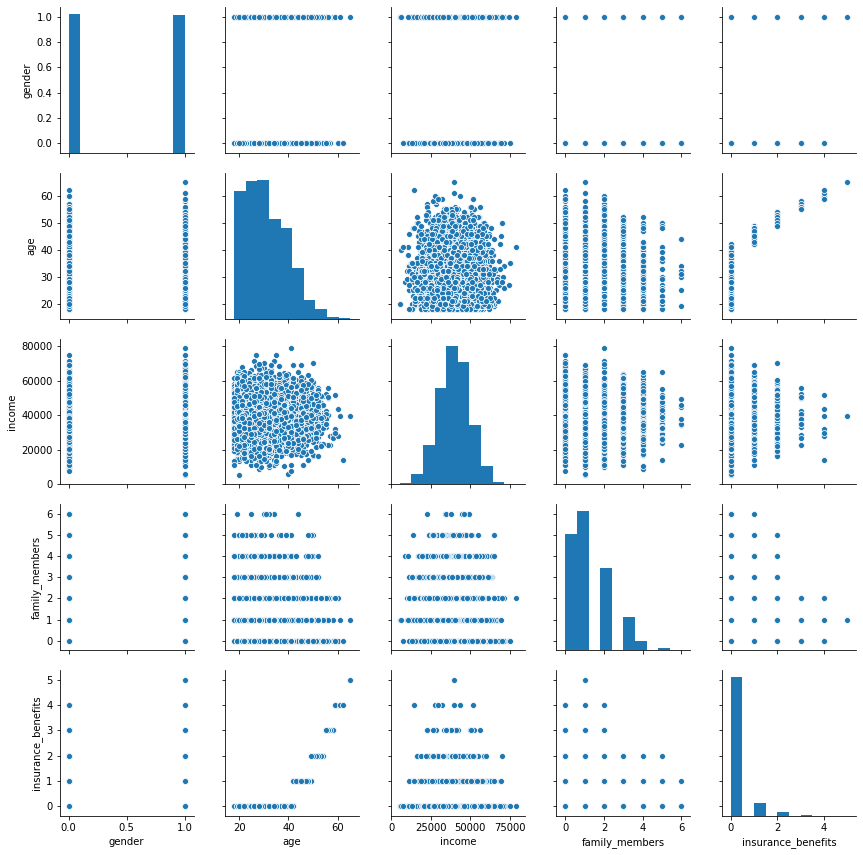

In [10]:
g = sns.pairplot(df )
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [12]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, algorithm='auto', metric=metric).fit(df.drop('insurance_benefits', axis=1).to_numpy())
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [14]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1666,0.0,0.553846,0.401266,0.166667,0
1809,0.0,0.569231,0.402532,0.500000,0
2181,0.0,0.615385,0.336709,0.333333,0
1592,0.0,0.461538,0.643038,0.166667,0
1849,1.0,0.276923,0.496203,0.333333,0


Now, let's get similar records for a given one for every combination

In [15]:
metrics = ['euclidean', 'manhattan']
datasets = {'original': df, 'scaled': df_scaled}
analyzed_sample = 2

print('Analyzed sample:\n', df.iloc[analyzed_sample], '\n', sep='')

for metric in metrics:
    for data in datasets.keys():
        print('Metric', metric.upper(), 'on', data.upper(), 'data')
        display(get_knn(datasets[data], analyzed_sample, 6, metric)
                .drop(analyzed_sample, axis=0)
                )

Analyzed sample:
gender                    0.0
age                      29.0
income                21000.0
family_members            0.0
insurance_benefits        0.0
Name: 2, dtype: float64

Metric EUCLIDEAN on ORIGINAL data


,gender,age,income,family_members,insurance_benefits,distance
4544,1,31,21000.0,1,0,2.449490
2031,0,30,20900.0,0,0,100.005000
1741,1,28,21100.0,0,0,100.010000
4805,0,28,21100.0,2,0,100.024997
2752,1,27,21100.0,1,0,100.029996


Metric EUCLIDEAN on SCALED data


,gender,age,income,family_members,insurance_benefits,distance
509,0.0,0.446154,0.255696,0.0,0,0.010127
224,0.0,0.446154,0.277215,0.0,0,0.011392
2031,0.0,0.461538,0.264557,0.0,0,0.015437
648,0.0,0.461538,0.289873,0.0,0,0.028550
3156,0.0,0.446154,0.308861,0.0,0,0.043038


Metric MANHATTAN on ORIGINAL data


,gender,age,income,family_members,insurance_benefits,distance
4544,1,31,21000.0,1,0,4.0
2031,0,30,20900.0,0,0,101.0
1741,1,28,21100.0,0,0,102.0
4805,0,28,21100.0,2,0,103.0
2752,1,27,21100.0,1,0,104.0


Metric MANHATTAN on SCALED data


,gender,age,income,family_members,insurance_benefits,distance
509,0.0,0.446154,0.255696,0.0,0,0.010127
224,0.0,0.446154,0.277215,0.0,0,0.011392
2031,0.0,0.461538,0.264557,0.0,0,0.016650
648,0.0,0.461538,0.289873,0.0,0,0.039435
3156,0.0,0.446154,0.308861,0.0,0,0.043038


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes. We can see that the lower distance samples are those with similar income, because the range of income values is much higher than the others, causing this feature to have a larger weight on distance calculation. It seems more appropriate to scale the data so that every feature has a similar weight.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

They are very different. By checking the tables, it is clear to see that the scaling had a much more significant impact on the results. The Manhattan distance is more suitable for data with large ammounts of features when compared to Euclidean distance.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [16]:
df['insurance_benefits_received'] = df['insurance_benefits'] > 0
target = df['insurance_benefits_received']

In [17]:
target.value_counts()

False    4436
True      564
Name: insurance_benefits_received, dtype: int64

In [18]:
target_train = target.sample(frac=0.7, random_state=42)
features_train = df_scaled.iloc[target_train.index]

target_test = target.loc[~target.index.isin(target_train.index)]
features_test = df_scaled.iloc[target_test.index]

In [19]:
target_train_not_scaled = target.sample(frac=0.7, random_state=42)
features_train_not_scaled = df.iloc[target_train.index]

target_test_not_scaled = target.loc[~target.index.isin(target_train.index)]
features_test_not_scaled = df.iloc[target_test.index]

In [20]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [21]:
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [22]:
for k in range(1,11):
    print('\nK =', k)
    neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k) #euclidean
    
    neighbors_model.fit(features_train, target_train)
    
    eval_classifier(target_test, neighbors_model.predict(features_test))


K = 1
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 2
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 3
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 4
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 5
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 6
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 7
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 8
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 9
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]

K = 10
F1: 1.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.         0.11266667]]


In [23]:
print('Testing on unscaled data')
neighbors_model = sklearn.neighbors.KNeighborsClassifier()

neighbors_model.fit(features_train_not_scaled, target_train_not_scaled)

eval_classifier(target_test_not_scaled, neighbors_model.predict(features_test_not_scaled))

Testing on unscaled data
F1: 0.25
Confusion Matrix
[[0.88       0.00733333]
 [0.09533333 0.01733333]]


In [24]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [25]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [26]:
def eval_regressor(y_true, y_pred):
    
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = np.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [27]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.19740784e-01  3.54081517e-02  1.84735250e-04 -3.89692232e-07
 -1.37746920e-02]
RMSE: 0.36
R2: 0.65


In [28]:
print('Testing on unscaled data')
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

Testing on unscaled data
[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


**Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?**

There aren't significant differences in metrics between both cases, but the weights are not the same.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the invertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [29]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [30]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [31]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [32]:
try:
    print('Inverse of P matrix')
    display(np.linalg.inv(P))
except np.linalg.LinAlgError:
    print('Singular matrix')

Inverse of P matrix


array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Can you guess the customers' ages or income after the transformation?

In [33]:
Xdash = X @ P
Xdash

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [34]:
X = Xdash @ np.linalg.inv(P)
X

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [35]:
sample = df[personal_info_column_list].sample(5).to_numpy()
print(sample, '\n')

sample_dash = sample @ P

print(sample_dash, '\n')

recovered_sample = sample_dash @ np.linalg.inv(P)

print(recovered_sample)

[[0.00e+00 4.30e+01 2.72e+04 1.00e+00]
 [1.00e+00 2.70e+01 4.66e+04 1.00e+00]
 [0.00e+00 3.50e+01 1.34e+04 0.00e+00]
 [0.00e+00 3.60e+01 3.03e+04 0.00e+00]
 [0.00e+00 1.90e+01 3.74e+04 0.00e+00]] 

[[ 3489.38429985 12293.27203349 10118.87868051 25242.03570053]
 [ 5974.05589224 21015.58814948 17301.04071331 43209.39682334]
 [ 1720.01888503  6069.31835011  4995.33341429 12446.16310126]
 [ 3885.23345459 13681.81632289 11262.58116352 28109.2774771 ]
 [ 4793.23923168 16862.97090198 13882.30776064 34675.94580474]] 

[[-3.21251141e-12  4.30000000e+01  2.72000000e+04  1.00000000e+00]
 [ 1.00000000e+00  2.70000000e+01  4.66000000e+04  1.00000000e+00]
 [ 1.43239034e-13  3.50000000e+01  1.34000000e+04 -1.02900464e-12]
 [-2.64387412e-12  3.60000000e+01  3.03000000e+04  1.13565624e-12]
 [-4.81330048e-12  1.90000000e+01  3.74000000e+04  2.76138165e-12]]


**You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?**

That happens because of Numpy's maximum precision. The data is stored in float64 and when trying to recovery the original data, there is a residual value. It is in evidence when the value is close enough to zero, because the value does not have a higher order significant value.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

**Answer**

$\hat{y} = X_{val}^{'} w_P$

$\hat{y} = X_{val} P P^{-1} w$

$\hat{y} = X w$

After obfuscation, the predicted values are the same as the original ones, so the quality of the model is the same as the quality of the original model.

**Analytical proof**

$w_p = ( P^T X^T X P )^{-1} (P^T X^T) y$

$w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$

$w_p = P^{-1} (X^T X)^{-1} X^T y$

$w_p = P^{-1} w$


## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [60]:
class MyLinearRegression():
    
    def __init__(self, P):
        
        self.weights = None
        self.P = P
        self.weights_p = None
    
    def fit(self, X, y):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

        X = X @ self.P
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights_p = np.linalg.inv(X2.T @ X2) @ X2.T @ y
        
    def predict(self, X, obf=False):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        if obf == False:
            y_pred = X2 @ self.weights
        else:
            y_pred = X2 @ self.weights_p
        
        return y_pred
    
    def define_obfuscation(P):
        
        self.P = P

In [57]:
P = rng.random(size=(X.shape[1], X.shape[1]))

try:
    np.linalg.inv(P)
except np.linalg.LinAlgError:
    print('Singular matrix')

In [61]:
model = MyLinearRegression(P)
model.fit(X_train, y_train)

In [70]:
model.predict(X_test @ P, obf=True)
sklearn.metrics.r2_score(y_test, model.predict(X_test @ P, obf=True))

0.4305278542485127

In [71]:
model.predict(X_test, obf=False)
sklearn.metrics.r2_score(y_test, model.predict(X_test, obf=False))

0.4305278542485147

**Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?**

The impact is minimal and is mostly related to the residue of linear operations at the $10^{-14}$ order.

# Conclusions

In this project we could succesfully create linear models either for classification or for regression. 